In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dataset/Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [ ]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_outl = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_outl

print(finding_outlier(df['Kematian_anak']))
print(finding_outlier(df['Jumlah_fertiliti']))

31     149.0
32     150.0
66     208.0
132    160.0
Name: Kematian_anak, dtype: float64
112    7.49
Name: Jumlah_fertiliti, dtype: float64


In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_outfin = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_outfin

df2 = remove_outlier(df[['Kematian_anak', 'Jumlah_fertiliti']])

df2.dropna(axis=0, inplace=True)
df2

,Kematian_anak,Jumlah_fertiliti
0,90.2,5.82
1,16.6,1.65
2,27.3,2.89
3,119.0,6.16
4,10.3,2.13
...,...,...
162,29.2,3.50
163,17.1,2.47
164,23.3,1.95
165,56.3,4.67


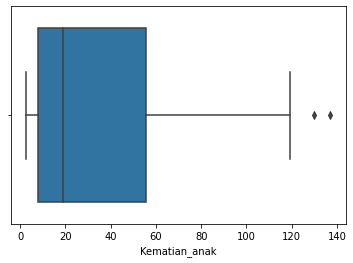

In [ ]:
sns.boxplot('Kematian_anak', data=df2);

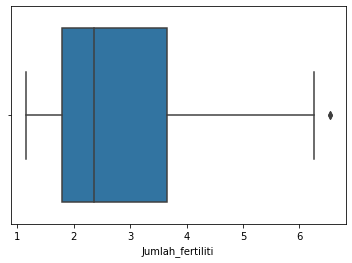

In [ ]:
sns.boxplot('Jumlah_fertiliti', data=df2);

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)

#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
new_df = pd.DataFrame(data=df_std, columns=['Kematian_anak', 'Jumlah_fertiliti'])
new_df['label1_kmeans'] = labels1
new_df

,Kematian_anak,Jumlah_fertiliti,label1_kmeans
0,1.614829,2.052926,1
1,-0.521814,-0.846277,0
2,-0.211188,0.015836,0
3,2.450907,2.289312,1
4,-0.704706,-0.512556,0
...,...,...,...
157,-0.156030,0.439940,0
158,-0.507299,-0.276170,0
159,-0.327310,-0.637701,0
160,0.630696,1.253386,1


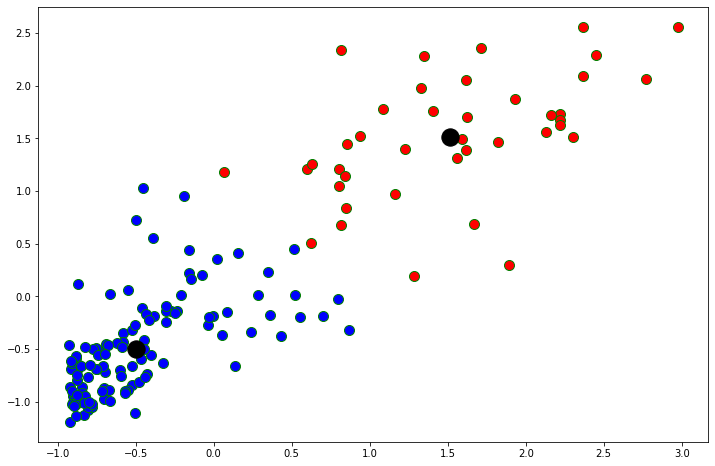

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Kematian_anak'][new_df.label1_kmeans==0], new_df['Jumlah_fertiliti'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Kematian_anak'][new_df.label1_kmeans==1], new_df['Jumlah_fertiliti'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

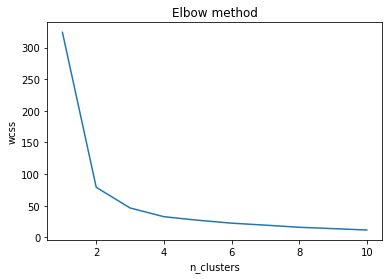

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_

new_df['label2_kmeans'] = labels2
new_df

,Kematian_anak,Jumlah_fertiliti,label1_kmeans,label2_kmeans
0,1.614829,2.052926,1,2
1,-0.521814,-0.846277,0,1
2,-0.211188,0.015836,0,3
3,2.450907,2.289312,1,2
4,-0.704706,-0.512556,0,1
...,...,...,...,...
157,-0.156030,0.439940,0,3
158,-0.507299,-0.276170,0,3
159,-0.327310,-0.637701,0,1
160,0.630696,1.253386,1,0


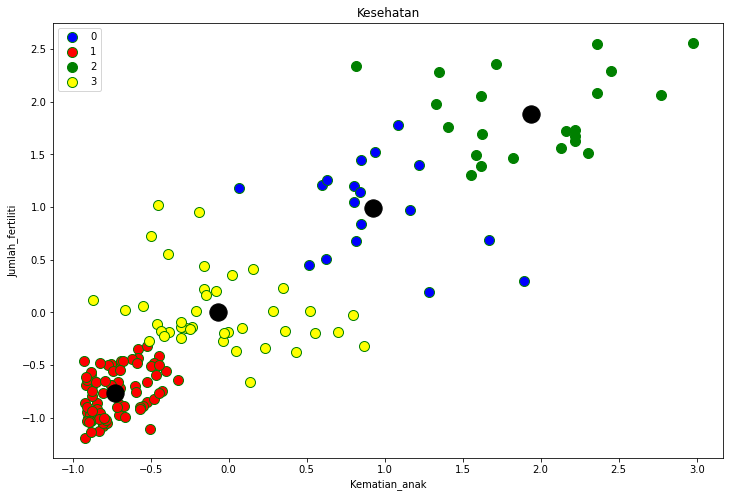

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Kematian_anak'][new_df.label2_kmeans==0], new_df['Jumlah_fertiliti'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Kematian_anak'][new_df.label2_kmeans==1], new_df['Jumlah_fertiliti'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Kematian_anak'][new_df.label2_kmeans==2], new_df['Jumlah_fertiliti'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Kematian_anak'][new_df.label2_kmeans==3], new_df['Jumlah_fertiliti'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
plt.title('Kesehatan')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.6866507776692582
0.5181557940752515


In [ ]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeansb = kmeansb.fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([2, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 3,
       1, 1, 1, 2, 2, 3, 2, 1, 3, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 3,
       3, 3, 1, 2, 0, 1, 3, 1, 1, 0, 2, 1, 1, 0, 1, 1, 3, 2, 2, 3, 1, 1,
       3, 3, 1, 0, 1, 3, 1, 1, 1, 3, 3, 0, 0, 1, 3, 0, 1, 1, 0, 2, 1, 1,
       1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 2, 3, 0, 3, 1, 1, 2,
       1, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 0, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 0, 3, 1, 1, 0, 0, 1, 2, 2, 3, 1, 1, 3, 2, 1, 1, 1,
       1, 1, 3, 3, 3, 1, 0, 2], dtype=int32)

In [ ]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Kematian_anak', 'Jumlah_fertiliti'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,Kematian_anak,Jumlah_fertiliti,label1_kmeans,label2_kmeans
0,90.2,5.82,1,2
1,16.6,1.65,0,1
2,27.3,2.89,0,3
3,119.0,6.16,1,2
4,10.3,2.13,0,1
...,...,...,...,...
157,29.2,3.50,0,3
158,17.1,2.47,0,3
159,23.3,1.95,0,1
160,56.3,4.67,1,0


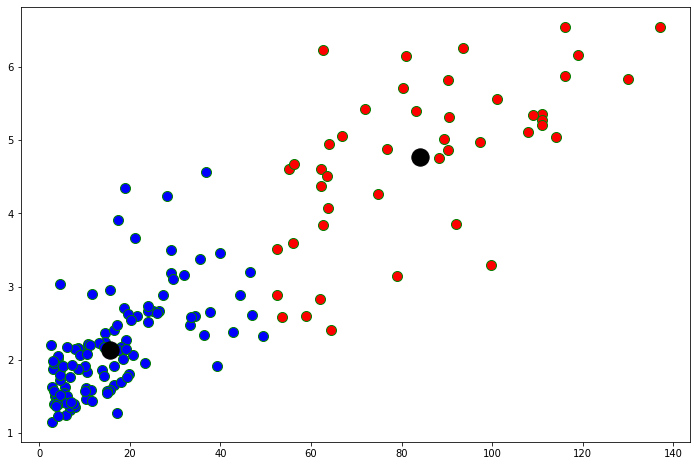

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Kematian_anak'][new_df1.label1_kmeans == 0], new_df1['Jumlah_fertiliti'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['Kematian_anak'][new_df1.label1_kmeans == 1], new_df1['Jumlah_fertiliti'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

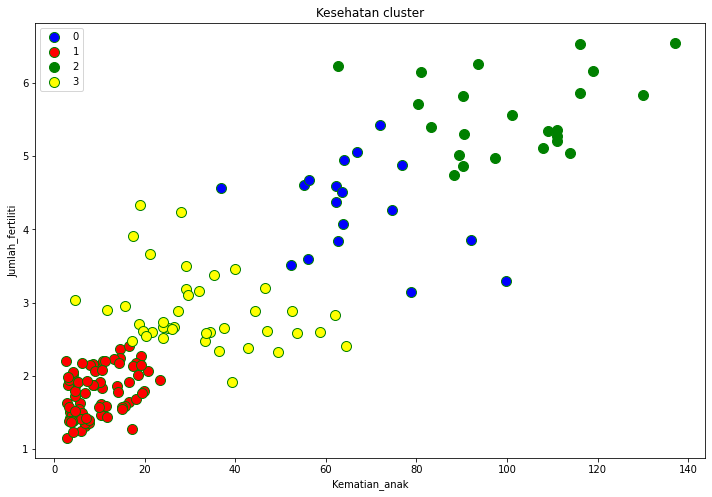

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Kematian_anak'][new_df1.label2_kmeans == 0], new_df1['Jumlah_fertiliti'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['Kematian_anak'][new_df1.label2_kmeans == 1], new_df1['Jumlah_fertiliti'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['Kematian_anak'][new_df1.label2_kmeans == 2], new_df1['Jumlah_fertiliti'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['Kematian_anak'][new_df1.label2_kmeans == 3], new_df1['Jumlah_fertiliti'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Kesehatan cluster')
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
plt.show()

In [ ]:
#summary to main data
df3 = pd.merge(df,new_df1, how='outer')

df3['label2_kmeans'] = df3['label2_kmeans'].astype('object')
df3

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0.0,3
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
204,NaN,8.6,NaN,NaN,NaN,NaN,NaN,NaN,1.87,NaN,0.0,1
205,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,1.92,NaN,0.0,1
206,NaN,7.3,NaN,NaN,NaN,NaN,NaN,NaN,1.93,NaN,0.0,1
207,NaN,10.6,NaN,NaN,NaN,NaN,NaN,NaN,2.08,NaN,0.0,1


In [ ]:
top_death = df3[df3['label2_kmeans']==2]
top_death

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1.0,2
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1.0,2
17,Benin,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1.0,2
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,1.0,2
28,Cameroon,108.0,22.20,5.13,27.0,2660.0,1.910,57.3,5.11,1310.0,1.0,2
36,Comoros,88.2,16.50,4.51,51.7,1410.0,3.870,65.9,4.75,769.0,1.0,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.800,57.5,6.54,334.0,1.0,2
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690.0,5.390,56.3,5.27,1220.0,1.0,2
49,Equatorial Guinea,111.0,85.80,4.48,58.9,33700.0,24.900,60.9,5.21,17100.0,1.0,2
56,Gambia,80.3,23.80,5.69,42.7,1660.0,4.300,65.5,5.71,562.0,1.0,2


In [ ]:
death=top_death.sort_values(by=['Kematian_anak'],ascending=False)[:10].reset_index()
death.dropna(axis=0)

,index,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,97,Mali,137.0,22.8,4.98,35.1,1870.0,4.370,59.5,6.55,708.0,1.0,2
1,113,Nigeria,130.0,25.3,5.07,17.4,5150.0,104.000,60.5,5.84,2330.0,1.0,2
2,3,Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1.0,2
4,37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609.0,20.800,57.5,6.54,334.0,1.0,2
5,64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390.0,2.970,55.6,5.05,547.0,1.0,2
6,49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700.0,24.900,60.9,5.21,17100.0,1.0,2
7,17,Benin,111.0,23.8,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1.0,2
8,40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690.0,5.390,56.3,5.27,1220.0,1.0,2
9,63,Guinea,109.0,30.3,4.93,43.2,1190.0,16.100,58.0,5.34,648.0,1.0,2


In [ ]:
fert=top_death.sort_values(by=['Jumlah_fertiliti'],ascending=False)[:10].reset_index()
fert.dropna(axis=0)

,index,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,97,Mali,137.0,22.80,4.98,35.1,1870.0,4.37,59.5,6.55,708.0,1.0,2
1,37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.54,334.0,1.0,2
2,26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.26,231.0,1.0,2
3,149,Timor-Leste,62.6,2.20,9.12,27.8,1850.0,26.50,71.1,6.23,3600.0,1.0,2
4,3,Angola,119.0,62.30,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1.0,2
5,155,Uganda,81.0,17.10,9.01,28.6,1540.0,10.60,56.8,6.15,595.0,1.0,2
7,113,Nigeria,130.0,25.30,5.07,17.4,5150.0,104.00,60.5,5.84,2330.0,1.0,2
8,0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,2
9,56,Gambia,80.3,23.80,5.69,42.7,1660.0,4.30,65.5,5.71,562.0,1.0,2
